# K-Means with Elbow method

In [7]:
# =============================================================================
# K-Means with Elbow method
# =============================================================================

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Elbow Method
from sklearn.cluster import KMeans

In [8]:
# Dataset
dataset = pd.read_csv('CC_GENERAL.csv', encoding='utf-8')
X = dataset[["BALANCE", "PURCHASES"]].values

Iteraction Nº Clusters: k: 2
Iteraction Nº Clusters: k: 3
Iteraction Nº Clusters: k: 4
Iteraction Nº Clusters: k: 5
Iteraction Nº Clusters: k: 6
Iteraction Nº Clusters: k: 7
Iteraction Nº Clusters: k: 8
Iteraction Nº Clusters: k: 9
Iteraction Nº Clusters: k: 10
Iteraction Nº Clusters: k: 11
Iteraction Nº Clusters: k: 12
Iteraction Nº Clusters: k: 13
Iteraction Nº Clusters: k: 14
Iteraction Nº Clusters: k: 15
Iteraction Nº Clusters: k: 16
Iteraction Nº Clusters: k: 17
Iteraction Nº Clusters: k: 18
Iteraction Nº Clusters: k: 19


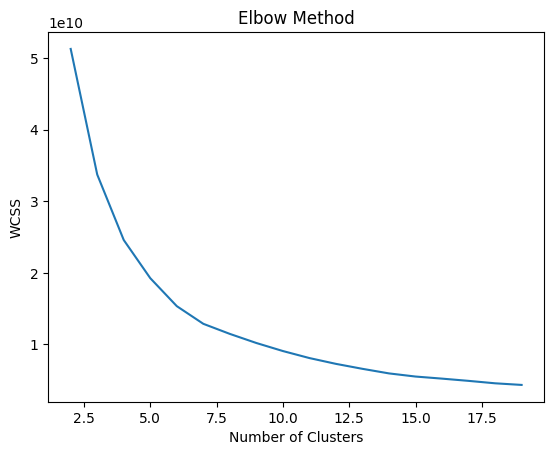

Iteraction Nº Clusters: k: 2
Iteraction Nº Clusters: k: 3
Iteraction Nº Clusters: k: 4


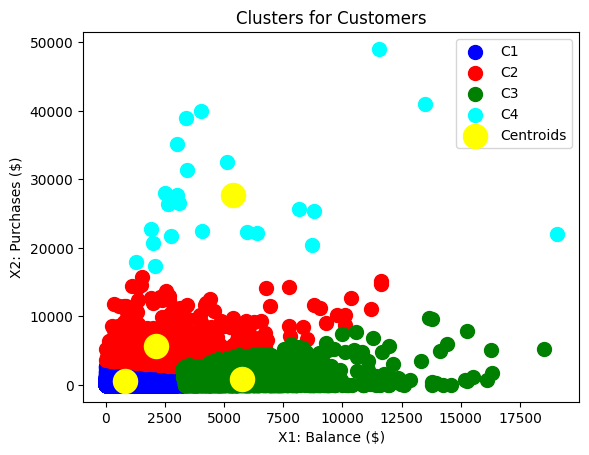

In [10]:
def elbow_method(epsilon, X, figure=False):
    wcss = [] # We set a vector to 0 to see the different wcss according to the number of clusters that I define

    diff = np.inf # Difference value between two iterations
    i_init = 2
    i = i_init
    while diff > epsilon:
        print("Iteraction Nº Clusters: k: {k}".format(k=i))

        # With init = k-means ++ and with n_init we define that we want to use the option of ++
        # (which takes into account the starting position and its influence)
        # and take 10 starting positions to compare
        kmeans = KMeans(n_clusters = i,
                        init = 'k-means++',
                        max_iter = 300,
                        n_init = 10,
                        random_state = 0)
        kmeans.fit(X)

        # First iteration
        if diff == np.inf:
            diff = kmeans.inertia_
        # If it is 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Remaining iterations
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1

    if figure:
        plt.plot(range(i_init,len(wcss)+i_init), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.show()

    # Final clusters
    k = i-1
    return wcss, k



# Plot results
epsilon = 0.05 # Threshold value
wcss, _ = elbow_method(epsilon, X, figure=True)

# Obtaining optimum K
epsilon = 0.33
_, k = elbow_method(epsilon, X, figure=False)

# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Plot clustes (one by one)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'C4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters for Customers')
plt.xlabel('X1: Balance ($)')
plt.ylabel('X2: Purchases ($)')
plt.legend()
plt.show()